# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
Klasifikasi pada Dataset Raisin menggunakan Metode K-Nearest Neighbors (KNN)

<b>Kelompok: </b>

Anggota:
1. Muhammad Rizky Yulianto - 1301213455
2. Shidqi Amarullah - 1301201571


#### Pendahuluan
  Tugas besar ini bertujuan untuk mengevaluasi kinerja algoritma K-Nearest Neighbors (KNN) pada dataset "Raisin". Dataset ini menyediakan informasi tentang fitur-fitur buah anggur Raisin yang relevan.

Kami membagi dataset menjadi data pelatihan (70%) dan data pengujian (10%) dan Data Validasi (20%) setelah memahami struktur dataset dan memisahkan fitur-fitur dari label kelas yang ingin diprediksi. Selain itu, kami menerapkan teknik validasi silang untuk memastikan evaluasi model yang lebih akurat.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 #Load dataset
file_path = '/content/Raisin_Dataset.xlsx'
df = pd.read_excel(file_path)

In [ ]:
print(df.head())

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  


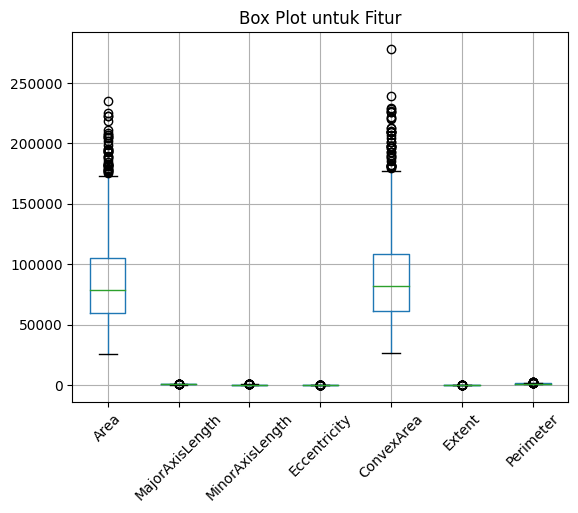

In [ ]:
# Box plot untuk mengecek distribusi fitur
df.iloc[:, :-1].boxplot()
plt.title('Box Plot untuk Fitur')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Print all column names with their respective indices
for index, column in enumerate(df.columns):
    print(f"Index: {index}, Column Name: {column}")

# Alternatively, you can use this approach to get the indices directly
area_index = df.columns.get_loc("Area")
convex_area_index = df.columns.get_loc("ConvexArea")

print(f"\nIndex for 'Area': {area_index}")
print(f"Index for 'ConvexArea': {convex_area_index}")


Index: 0, Column Name: Area
Index: 1, Column Name: MajorAxisLength
Index: 2, Column Name: MinorAxisLength
Index: 3, Column Name: Eccentricity
Index: 4, Column Name: ConvexArea
Index: 5, Column Name: Extent
Index: 6, Column Name: Perimeter
Index: 7, Column Name: Class

Index for 'Area': 0
Index for 'ConvexArea': 4


Original data size: 900
Number of 'Area' outliers: 41
Number of 'ConvexArea' outliers: 42


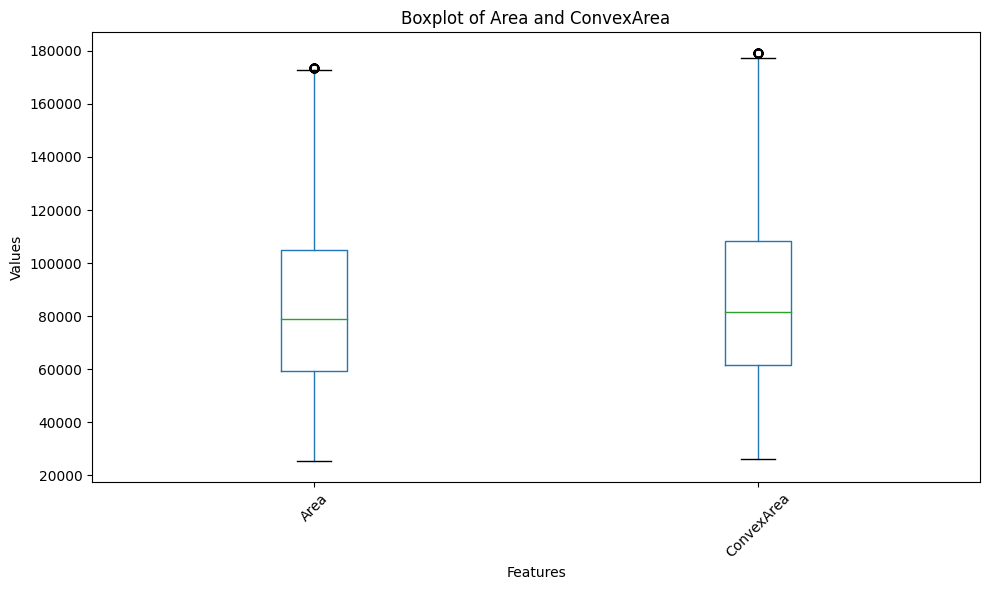

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/Raisin_Dataset.xlsx'
df = pd.read_excel(file_path)

# Define functions for calculating quartiles, identifying outliers, and winsorizing data
def calculate_quartiles(column_data):
    column_data_numeric = pd.to_numeric(column_data, errors='coerce')  # Convert to numeric, coerce errors to NaN
    column_data_numeric = pd.Series(column_data_numeric)  # Convert to pandas Series
    column_data_numeric = column_data_numeric.dropna()  # Drop NaN values
    sorted_column_data = column_data_numeric.sort_values()
    Q1 = sorted_column_data.iloc[int(len(sorted_column_data) * 0.25)]
    Q3 = sorted_column_data.iloc[int(len(sorted_column_data) * 0.75)]
    return Q1, Q3

def find_outliers_iqr(df, column_index):
    column_data = df.iloc[:, column_index]  # Get column data by index
    Q1, Q3 = calculate_quartiles(column_data)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df.iloc[:, column_index] < lower_bound) | (df.iloc[:, column_index] > upper_bound)]
    return outliers, lower_bound, upper_bound

def winsorize_data(df, column_index, lower_bound, upper_bound):
    df.loc[df.iloc[:, column_index] < lower_bound, df.columns[column_index]] = lower_bound
    df.loc[df.iloc[:, column_index] > upper_bound, df.columns[column_index]] = upper_bound
    return df

# Indices for "Area" and "ConvexArea"
area_index = 0  # Assuming "Area" is at index 0
convex_area_index = 4  # Assuming "ConvexArea" is at index 4 (adjusted from your mistaken comment of 7)

# Identify and handle outliers for "Area"
area_outliers, area_lower_bound, area_upper_bound = find_outliers_iqr(df, area_index)
df = winsorize_data(df, area_index, area_lower_bound, area_upper_bound)

# Identify and handle outliers for "ConvexArea"
convex_area_outliers, convex_area_lower_bound, convex_area_upper_bound = find_outliers_iqr(df, convex_area_index)
df = winsorize_data(df, convex_area_index, convex_area_lower_bound, convex_area_upper_bound)

# Display information about data after handling outliers
print(f"Original data size: {len(df)}")
print(f"Number of 'Area' outliers: {len(area_outliers)}")
print(f"Number of 'ConvexArea' outliers: {len(convex_area_outliers)}")

# Recreate DataFrame after handling outliers
data_subset = df[['Area', 'ConvexArea']]

# Display boxplot for "Area" and "ConvexArea"
plt.figure(figsize=(10, 6))
data_subset.boxplot()
plt.title('Boxplot of Area and ConvexArea')
plt.ylabel('Values')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# Assume 'df' is your full DataFrame and contains labels in the last column
# Extract features, excluding the last column if it's the label
X = df.iloc[:, :-1]  # adjust according to your DataFrame structure

# Standardize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Display some rows of the data after standardization
print("Data Setelah Standardisasi:")
print(pd.DataFrame(X, columns=df.columns[:-1]).head())


Data Setelah Standardisasi:
       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  0.018185         0.097523        -0.023945      0.422906    0.013569   
1 -0.320913        -0.208896        -0.229165      0.224352   -0.299397   
2  0.109614         0.097704         0.236856      0.186136    0.097980   
3 -1.123190        -1.244359        -0.914765     -1.069028   -1.136662   
4 -0.204514        -0.678581         0.726949     -2.408488   -0.228216   

     Extent  Perimeter  
0  1.106128   0.066237  
1 -0.287617  -0.161163  
2 -1.157606   0.155858  
3  0.001711  -1.175261  
4  1.744289  -0.338450  


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and contains labels
# Let's also assume the label column in 'df' is named 'Class'
X = df.drop('Class', axis=1)  # Features
y = df['Class']               # Labels

# Standardize the features manually
X_mean = X.mean()
X_std = X.std()
X = (X - X_mean) / X_std

# Define the splitting ratios
train_ratio = 0.7
val_ratio = 0.1
test_ratio = 0.2  # Ensure these add up to 1.0

# Calculate the indices at which to split the train, validation, and test sets
train_index = int(len(X) * train_ratio)
val_index = train_index + int(len(X) * val_ratio)

# Split the data into training, validation, and test sets
X_train, y_train = X.iloc[:train_index], y.iloc[:train_index]
X_val, y_val = X.iloc[train_index:val_index], y.iloc[train_index:val_index]
X_test, y_test = X.iloc[val_index:], y.iloc[val_index:]

# Verify the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)



Training set shape: (630, 7) (630,)
Validation set shape: (90, 7) (90,)
Test set shape: (180, 7) (180,)


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'X_train', 'X_val', and 'X_test' are already defined and are pandas DataFrames

# Convert all columns of DataFrame to float dtype for X_train, X_val, and X_test
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_val = X_val.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill any NaNs that arise from conversion errors with the mean of the column
# This keeps the preprocessing step consistent across all data subsets
X_train.fillna(X_train.mean(), inplace=True)
X_val.fillna(X_train.mean(), inplace=True)  # Use X_train's mean to avoid data leakage
X_test.fillna(X_train.mean(), inplace=True)  # Use X_train's mean to ensure consistency

# Verify the preprocessing by checking the first few entries of each dataset
print("X_train preview:", X_train.head())
print("X_val preview:", X_val.head())
print("X_test preview:", X_test.head())



X_train preview:        Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  0.018185         0.097523        -0.023945      0.422906    0.013569   
1 -0.320913        -0.208896        -0.229165      0.224352   -0.299397   
2  0.109614         0.097704         0.236856      0.186136    0.097980   
3 -1.123190        -1.244359        -0.914765     -1.069028   -1.136662   
4 -0.204514        -0.678581         0.726949     -2.408488   -0.228216   

     Extent  Perimeter  
0  1.106128   0.066237  
1 -0.287617  -0.161163  
2 -1.157606   0.155858  
3  0.001711  -1.175261  
4  1.744289  -0.338450  
X_val preview:          Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
630  0.343454         0.305662         0.421843      0.279367    0.335853   
631  0.102178         0.506035        -0.302824      1.005795    0.152736   
632 -0.104168         0.121254        -0.263198      0.649163   -0.059927   
633 -0.891902        -0.588919        -1.231049      0.7209

In [ ]:
import numpy as np

# Assuming 'df' is your DataFrame that contains the label column named 'Class'
X = df.drop('Class', axis=1).values  # Convert DataFrame to numpy array for features
y = df['Class'].values  # Convert DataFrame column to numpy array for labels

# Function to calculate Euclidean distance between two points
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))

# Function to perform KNN prediction
def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        distances = []
        for train_point, label in zip(X_train, y_train):
            distance = euclidean_distance(test_point, train_point)
            distances.append((distance, label))
        # Sort distances and retrieve the labels of the k nearest neighbors
        k_nearest_neighbors = sorted(distances, key=lambda x: x[0])[:k]
        labels = [label for _, label in k_nearest_neighbors]
        most_common = max(set(labels), key=labels.count)
        y_pred.append(most_common)
    return y_pred

# Function to calculate accuracy
def accuracy(y_true, y_pred):
    correct = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    return correct / len(y_true)

# Function to perform manual cross-validation
def manual_cross_validation(X, y, k, num_folds=5):
    fold_size = int(len(X) / num_folds)
    accuracies = []
    for fold in range(num_folds):
        start = fold * fold_size
        end = start + fold_size
        if fold == num_folds - 1:
            end = len(X)  # Ensure the last fold includes the rest of the data
        X_train = np.concatenate([X[:start], X[end:]])
        y_train = np.concatenate([y[:start], y[end:]])
        X_test = X[start:end]
        y_test = y[start:end]
        y_pred = knn_predict(X_train, y_train, X_test, k)
        accuracies.append(accuracy(y_test, y_pred))
    return np.mean(accuracies)

# Testing different k values to find the best one
k_values = range(1, 11)
best_k = None
highest_accuracy = 0

for k in k_values:
    cv_accuracy = manual_cross_validation(X, y, k)
    print(f"K={k}, Cross-Validated Accuracy: {cv_accuracy}")
    if cv_accuracy > highest_accuracy:
        highest_accuracy = cv_accuracy
        best_k = k

print(f"Best k: {best_k} with Accuracy: {highest_accuracy}")


K=1, Cross-Validated Accuracy: 0.7322222222222223
K=2, Cross-Validated Accuracy: 0.6933333333333334
K=3, Cross-Validated Accuracy: 0.7655555555555557
K=4, Cross-Validated Accuracy: 0.7466666666666667
K=5, Cross-Validated Accuracy: 0.7788888888888889
K=6, Cross-Validated Accuracy: 0.7577777777777778
K=7, Cross-Validated Accuracy: 0.7733333333333332
K=8, Cross-Validated Accuracy: 0.7666666666666668
K=9, Cross-Validated Accuracy: 0.7755555555555557
K=10, Cross-Validated Accuracy: 0.7655555555555555
Best k: 5 with Accuracy: 0.7788888888888889


#### Metode yang Digunakan
Metode yang kami gunakan adalah menggunakan KNN, kami perlu menentukan parameter k, Pemilihan nilai k ini dapat mempengaruhi kinerja model, sehingga penting untuk memilih nilai k yang optimal.

kami melakukan penyesuaian parameter dengan melakukan evaluasi menggunakan beberapa nilai k yang berbeda. Kami memilih rentang nilai k yang mencakup k dari 1 hingga 10.

kami menggunakan teknik validasi silang (cross-validation) untuk mengevaluasi kinerja model KNN dengan setiap nilai k yang dipilih. Dalam validasi silang, dataset pelatihan dibagi menjadi beberapa lipatan (folds), di mana masing-masing fold digunakan secara bergantian sebagai data validasi sementara fold lainnya digunakan sebagai data pelatihan. Ini membantu kami menghindari bias yang mungkin terjadi dalam pembagian data acak dan memberikan estimasi yang lebih akurat tentang kinerja model.

Setelah mengevaluasi model menggunakan setiap nilai k, kami memilih nilai k yang memberikan hasil terbaik dalam hal akurasi klasifikasi pada dataset Raisin.

#### Hasil dan Analisis
Dari hasil evaluasi dengan rentang nilai k dari 1 hingga 10, kami mendapat variasi dalam akurasi validasi untuk setiap nilai k. Berikut adalah hasil analisis lebih rinci:

- Untuk nilai k=1, kami memperoleh rata-rata akurasi validasi sebesar 0.7322.
- Untuk nilai k=2, rata-rata akurasi validasi adalah 0.6933, memiliki nilai rata-rata terkecil.
- Nilai k=3 memberikan rata-rata akurasi validasi sebesar 0.7655.
- Pada nilai k=4, akurasi validasi mencapai 0.7466.
- Nilai k=5 menghasilkan rata-rata akurasi validasi 0.7788, k=5 memiliki nilai tertinggi.
- Akurasi validasi untuk k=6 adalah 0.7577.
- Nilai k=7, memberikan rata-rata akurasi nilai rata-rata sebesar 0.7733.
- Pada nilai k=8, rata-rata akurasi validasi tetap stabil di 0.7666.
- Nilai k=9 memberikan akurasi validasi sebesar 0.7755.
- Terakhir, untuk k=10, akurasi validasi adalah 0.7655.

Berdasarkan hasil diatas, kami menyimpulkan untuk memilih nilai k=5 untuk model KNN pada dataset Raisin, karena memberikan performa terbaik dalam hal akurasi klasifikasi berdasarkan hasil evaluasi yang telah dilakukan.

#### Kesimpulan
Berdasarkan evaluasi KNN dengan nilai k dari 1 hingga 10 pada dataset Raisin, kami menyimpulkan bahwa nilai k=5 memberikan akurasi validasi tertinggi sebesar 0.7788. Meskipun terdapat variasi kecil dalam akurasi untuk beberapa nilai k, nilai k=5 menonjol sebagai pilihan terbaik dalam memprediksi kelas pada dataset Raisin.